In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 91s 1us/step


(50000, 32, 32, 3)

In [3]:
x_test.shape

(10000, 32, 32, 3)

In [14]:
y_train.shape

(50000, 1)

In [15]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [6]:
## Here for the shape of x means, the first is number of images and then the 2 are dimension of image and then it is for the channel
# As there are 3 channels (R,G,B) --> This is the 3 dimensions
# So in x it is for image and for y it is for target

In [7]:
y_train[0]

array([6], dtype=uint8)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
## Here these are te type of classes which are predicted by y

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

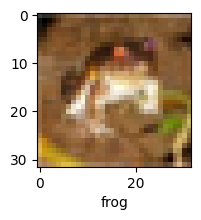

In [16]:
plot_sample(x_train,y_train,0)

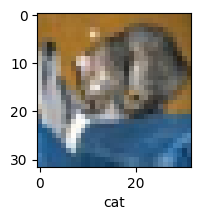

In [17]:
plot_sample(x_test,y_test,0)

In [23]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [24]:
# In the above divided by 255.0 for making the final as float

In [28]:
## We can also use only ANN model for prediction
# First we have to flatten our x then apply it to ann

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5


1563/1563 [==============================] - 66s 38ms/step - loss: 1.8114 - accuracy: 0.3567
Epoch 2/5
1563/1563 [==============================] - 56s 36ms/step - loss: 1.6245 - accuracy: 0.4276
Epoch 3/5
1563/1563 [==============================] - 54s 35ms/step - loss: 1.5417 - accuracy: 0.4555
Epoch 4/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.4808 - accuracy: 0.4795
Epoch 5/5
1563/1563 [==============================] - 76s 49ms/step - loss: 1.4300 - accuracy: 0.4977


In [26]:
## Building a CNN model with keras

In [30]:
cnn = models.Sequential([
    # Doing Convulation Operation
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = (32,32,3)),
    ## In first Convulation layer is detecting the intial edges
    # Now we will be adding a pooling layer
    layers.MaxPooling2D((2,2)),
    
    # Now second convulation layer
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    
    ### Now adding normal CNN Dense layer
    ## So before adding we have to flatten it
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    ## softmax function performs better than sigmoid
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.4936 - accuracy: 0.4596
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1379 - accuracy: 0.5967
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9864 - accuracy: 0.6553
Epoch 4/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8922 - accuracy: 0.6894
Epoch 5/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8183 - accuracy: 0.7138
Epoch 6/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7533 - accuracy: 0.7399
Epoch 7/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7052 - accuracy: 0.7560
Epoch 8/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6536 - accuracy: 0.7740
Epoch 9/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6115 - accuracy: 0.7879
Epoch 10/10
1563/1563 [==============================] - 23s 15m

In [31]:
## Now for evualting 
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.9715 - accuracy: 0.6898


[0.9715462923049927, 0.6898000240325928]

In [33]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 2s 6ms/step


array([[2.2406195e-05, 1.4408387e-08, 3.9239545e-05, 9.0746838e-01,
        3.9853735e-04, 9.0297364e-02, 1.5665460e-04, 2.2995423e-06,
        1.6132176e-03, 1.7830731e-06],
       [6.5240706e-04, 1.3033693e-05, 1.1480457e-06, 6.1320736e-07,
        5.0638338e-09, 1.7648567e-09, 4.3297213e-10, 7.9152990e-10,
        9.9932575e-01, 7.0761398e-06],
       [1.7279866e-01, 3.4927624e-01, 1.4171187e-03, 5.2177426e-03,
        1.1294622e-03, 8.1105012e-04, 1.9040341e-05, 1.6840292e-03,
        3.9148173e-01, 7.6164857e-02],
       [7.1323770e-01, 2.6921863e-02, 3.0499971e-02, 3.9327648e-04,
        7.9014186e-05, 2.0951657e-05, 9.0311817e-04, 8.8296460e-05,
        2.2775531e-01, 1.0058166e-04],
       [4.9849052e-05, 3.9643669e-03, 2.6752256e-02, 5.7105124e-02,
        3.3339634e-04, 1.1028621e-03, 9.1002792e-01, 1.2494249e-07,
        6.6250307e-04, 1.6823431e-06]], dtype=float32)

In [34]:
y_pred.shape

(10000, 10)

In [35]:
## Now for prediction of y-classes
# We need to use np.argmax for finding the max from the 10 numbers
yPredClass = [np.argmax(el) for el in y_pred]

In [39]:
type(yPredClass)

list

In [40]:
type(y_test)

numpy.ndarray

In [41]:
from sklearn.metrics import accuracy_score, classification_report

In [42]:
print("The accuracy is: ",accuracy_score(y_test,yPredClass))

The accuracy is:  0.6898


In [43]:
print("The classification report is: ",classification_report(y_test,yPredClass))

The classification report is:                precision    recall  f1-score   support

           0       0.75      0.66      0.70      1000
           1       0.84      0.77      0.81      1000
           2       0.59      0.57      0.58      1000
           3       0.50      0.53      0.51      1000
           4       0.63      0.65      0.64      1000
           5       0.62      0.58      0.60      1000
           6       0.75      0.75      0.75      1000
           7       0.73      0.75      0.74      1000
           8       0.77      0.82      0.79      1000
           9       0.74      0.83      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

